**A CUSTOMER CHURN PREDICTION AI MODEL**
****

This is an AI model developed by Samuel Dartey - Baah, to predict the kind of customers most likely to churn on telecom operators based on a given dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# installing scikeras to import KerasClassifier
!pip install scikeras
!pip install keras-tuner

In [ ]:
#importing necessary libraries which would be used
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import kerastuner as kt
from keras.models import Model
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from tensorflow import keras
from sklearn.impute import SimpleImputer
from keras.models import Sequential
from keras.layers import Dense, Input
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [ ]:
#importing the data set
customer_churn_df = pd.read_csv('/content/drive/MyDrive/CustomerChurn_dataset.csv')

In [ ]:
customer_churn_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Extracting Relevant Features Needed From The Dataset**
****

In [ ]:
# removing unnecessary colums in the data set
customer_churn_df.drop(columns=['customerID'], inplace=True)

In [ ]:
#checking to see if there are any null values
customer_churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
#checking the data types of the various values
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# converting total charges column into float
customer_churn_df['TotalCharges'] = pd.to_numeric(customer_churn_df['TotalCharges'], errors='coerce', downcast='float')

In [ ]:
number_of_null_total_Charges = customer_churn_df['TotalCharges'].isnull().sum()
print (f'There are {number_of_null_total_Charges} null values in the TotalCharges column')

There are 11 null values in the TotalCharges column


In [ ]:
# reshaping the data to an array for the SimpleImputer
total_charges_array= customer_churn_df['TotalCharges'].values.reshape(-1, 1)

# using simple imputer to fill the null values in the data set
sc=SimpleImputer(strategy='mean')
customer_churn_df['TotalCharges'] = sc.fit_transform(total_charges_array)

In [ ]:
# subsetting some groups of values the columns
customer_churn_df.replace('No internet Service', 'No', inplace = True)
customer_churn_df.replace('No internet service', 'No', inplace = True)
customer_churn_df.replace('No phone Service', 'No', inplace = True)

In [ ]:
# all columns including TotalCharges
customer_churn_df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
customer_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [ ]:
# creating a new data set for the encoded values
encoded_customer_churn_df = customer_churn_df.copy()

# converting caterogical values to numbers using label encoding
label_encoder = LabelEncoder()

encoded_customer_churn_df['gender' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['gender'])
encoded_customer_churn_df['Partner' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['Partner'])
encoded_customer_churn_df['Dependents' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['Dependents'])
encoded_customer_churn_df['PhoneService' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['PhoneService'])
encoded_customer_churn_df['MultipleLines' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['MultipleLines'])
encoded_customer_churn_df['InternetService' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['InternetService'])
encoded_customer_churn_df['OnlineSecurity' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['OnlineSecurity'])
encoded_customer_churn_df['OnlineBackup' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['OnlineBackup'])
encoded_customer_churn_df['DeviceProtection' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['DeviceProtection'])
encoded_customer_churn_df['TechSupport' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['TechSupport'])
encoded_customer_churn_df['StreamingTV' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['StreamingTV'])
encoded_customer_churn_df['StreamingMovies' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['StreamingMovies'])
encoded_customer_churn_df['Contract' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['Contract'])
encoded_customer_churn_df['PaperlessBilling' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['PaperlessBilling'])
encoded_customer_churn_df['PaymentMethod' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['PaymentMethod'])
encoded_customer_churn_df['Churn' + '_encoded'] = label_encoder.fit_transform(encoded_customer_churn_df['Churn'])

# drop the original columns which have now been encoded
encoded_customer_churn_df.drop(columns=['gender', 'Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn'], inplace= True)


In [ ]:
encoded_customer_churn_df

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_encoded,Partner_encoded,Dependents_encoded,PhoneService_encoded,MultipleLines_encoded,InternetService_encoded,OnlineSecurity_encoded,OnlineBackup_encoded,DeviceProtection_encoded,TechSupport_encoded,StreamingTV_encoded,StreamingMovies_encoded,Contract_encoded,PaperlessBilling_encoded,PaymentMethod_encoded,Churn_encoded
0,0,1,29.85,29.850000,0,1,0,0,1,0,0,1,0,0,0,0,0,1,2,0
1,0,34,56.95,1889.500000,1,0,0,1,0,0,1,0,1,0,0,0,1,0,3,0
2,0,2,53.85,108.150002,1,0,0,1,0,0,1,1,0,0,0,0,0,1,3,1
3,0,45,42.30,1840.750000,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0
4,0,2,70.70,151.649994,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.500000,1,1,1,1,2,0,1,0,1,1,1,1,1,1,3,0
7039,0,72,103.20,7362.899902,0,1,1,1,2,1,0,1,1,0,1,1,1,1,1,0
7040,0,11,29.60,346.450012,0,1,1,0,1,0,1,0,0,0,0,0,0,1,2,0
7041,1,4,74.40,306.600006,1,1,0,1,2,1,0,0,0,0,0,0,0,1,3,1


In [ ]:
encoded_customer_churn_df.info()
print()
print(('Now all columns are numeric and filled'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   SeniorCitizen             7043 non-null   int64  
 1   tenure                    7043 non-null   int64  
 2   MonthlyCharges            7043 non-null   float64
 3   TotalCharges              7043 non-null   float32
 4   gender_encoded            7043 non-null   int64  
 5   Partner_encoded           7043 non-null   int64  
 6   Dependents_encoded        7043 non-null   int64  
 7   PhoneService_encoded      7043 non-null   int64  
 8   MultipleLines_encoded     7043 non-null   int64  
 9   InternetService_encoded   7043 non-null   int64  
 10  OnlineSecurity_encoded    7043 non-null   int64  
 11  OnlineBackup_encoded      7043 non-null   int64  
 12  DeviceProtection_encoded  7043 non-null   int64  
 13  TechSupport_encoded       7043 non-null   int64  
 14  Streamin

In [ ]:
# using random forest to get the most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = encoded_customer_churn_df.drop(columns=['Churn_encoded'])
y = encoded_customer_churn_df['Churn_encoded']

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# creating a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=5, n_estimators=100)
rf_classifier.fit(X_train_scaled, y_train)

# getting the relevant features
feature_importances = rf_classifier.feature_importances_

# creating a data set of the most relevant features
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# getting the  6 most relevant features
needed_features = feature_importance_df.head(6)['Feature'].tolist()

print(f'These are the most necessary features: {needed_features}')

These are the most necessary features: ['MonthlyCharges', 'TotalCharges', 'tenure', 'Contract_encoded', 'PaymentMethod_encoded', 'InternetService_encoded']


**Exploratory Data Analysis**
****

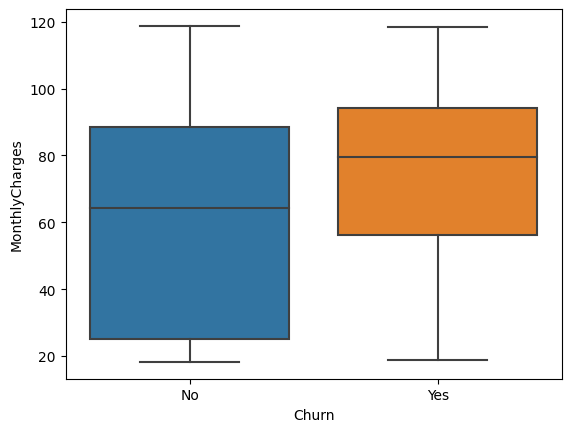

This shows people are more likely to churn if charges are around 88.00 dollars or more



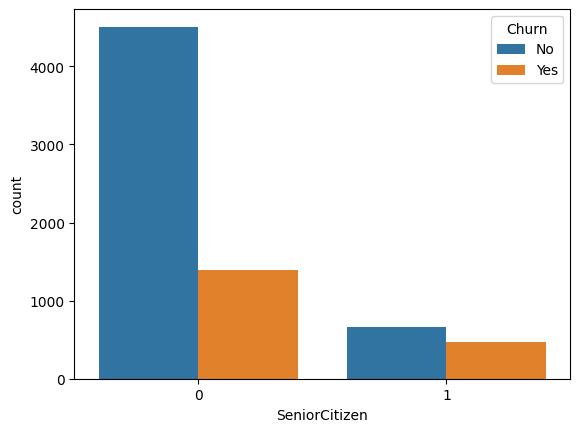

This shows more senior citizens are likely to Churn



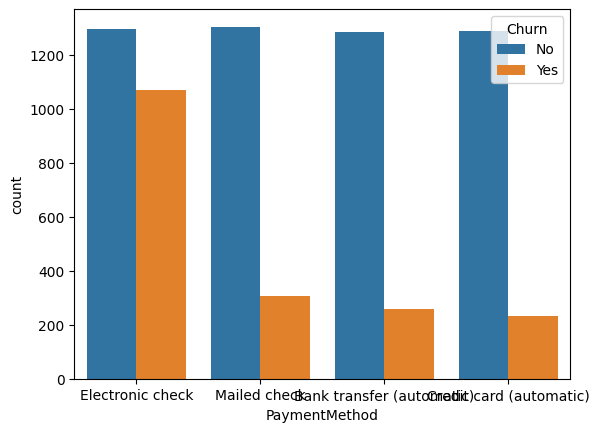

This shows people with electronic checks Churn more, than other payment types, and people with automatic payment systems churn less



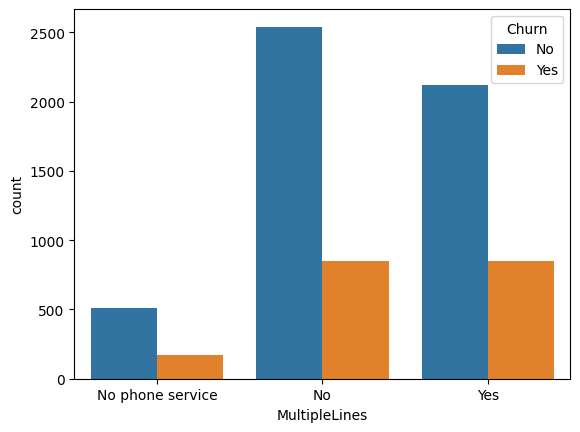

This shows people without multiple lines churn less



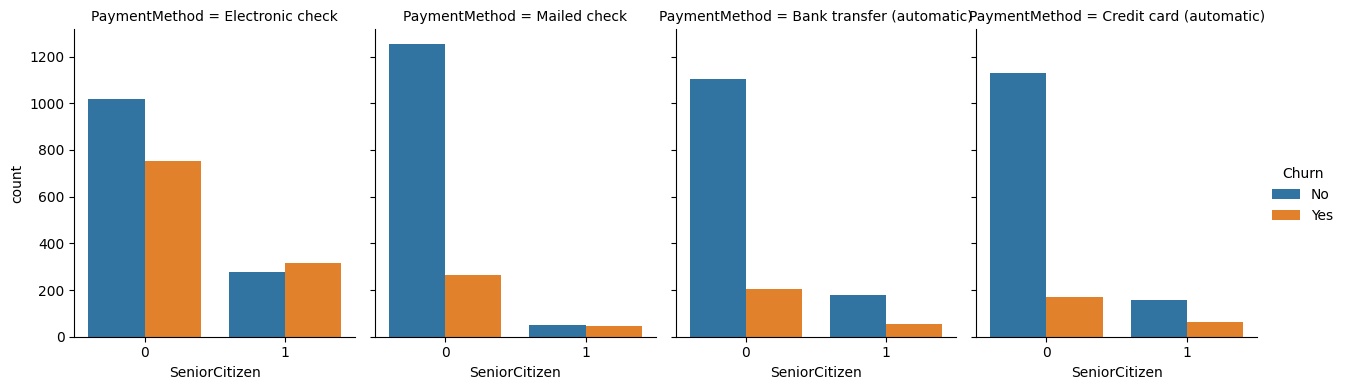

Senior citizens using electronic checks are more likely to Churn


In [ ]:
# using graphs to gain more insights about the data

sns.boxplot(x='Churn', y='MonthlyCharges', data= customer_churn_df )
plt.show()
print('This shows people are more likely to churn if charges are around 88.00 dollars or more')
print()

sns.countplot(x='SeniorCitizen', hue='Churn', data = customer_churn_df)
plt.show()
print('This shows more senior citizens are likely to Churn')
print()

sns.countplot(x='PaymentMethod', hue='Churn', data = customer_churn_df)
plt.show()
print('This shows people with electronic checks Churn more, than other payment types, and people with automatic payment systems churn less')
print()

sns.countplot(x='MultipleLines', hue='Churn', data = customer_churn_df)
plt.show()
print('This shows people without multiple lines churn less')
print()

sns.catplot(x='SeniorCitizen', hue='Churn', col='PaymentMethod', data=customer_churn_df, kind='count', height=4, aspect=0.8)
plt.show()
print('Senior citizens using electronic checks are more likely to Churn')


**Training The Data Using MLP**
****

In [ ]:
 # dividing data set into X and Y
 X = encoded_customer_churn_df[needed_features]
 y = encoded_customer_churn_df['Churn_encoded']

In [ ]:
# scaling the X
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

X = StandardScaler.fit_transform(X.copy())
X = pd.DataFrame(X, columns = needed_features)

In [ ]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)

# getting the number of neurons to be used
number_of_neurons = X_train.shape[1]

In [ ]:
# create a functional api with keras
from keras.src.losses import binary_crossentropy

def create_model(activation='relu',hidden_layer_sizes=(5, 5), input_shape=(number_of_neurons)):
    input_layer = Input(shape=input_shape)
    hidden_layer1 = Dense(hidden_layer_sizes[0], activation='relu')(input_layer)
    hidden_layer2 = Dense(hidden_layer_sizes[1], activation='relu')(hidden_layer1)
    output_layer = Dense(1, activation='sigmoid')(hidden_layer2)

    model = Model(inputs=input_layer, outputs=output_layer)
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

    return model


model = create_model()
model.fit(X_train, y_train, epochs=100)



Epoch 1/100
177/177 [==============================] - 1s 1ms/step - loss: 0.6070 - accuracy: 0.6905
Epoch 2/100
177/177 [==============================] - 0s 1ms/step - loss: 0.5005 - accuracy: 0.7368
Epoch 3/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4629 - accuracy: 0.7368
Epoch 4/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4507 - accuracy: 0.7368
Epoch 5/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.7662
Epoch 6/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4429 - accuracy: 0.7868
Epoch 7/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4405 - accuracy: 0.7898
Epoch 8/100
177/177 [==============================] - 0s 1ms/step - loss: 0.4391 - accuracy: 0.7904
Epoch 9/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4377 - accuracy: 0.7865
Epoch 10/100
177/177 [==============================] - 0s 2ms/step - loss: 0.4365 - accura

In [ ]:
model.evaluate(X_test, y_test)

45/45 [==============================] - 0s 1ms/step - loss: 0.4334 - accuracy: 0.7878


[0.43344685435295105, 0.7877927422523499]

In [ ]:
# defining parameters for the grid search
param_grid = {
    'hidden_layer_sizes': [(5, 5), (10, 10)],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32],
    'epochs': [50, 100]
}

In [ ]:
# creating an MLP classifier
mlp_classifier = KerasClassifier(build_fn = create_model, activation='relu',hidden_layer_sizes=(5, 5),verbose=0)

In [ ]:
# using GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=mlp_classifier, param_grid=param_grid, n_jobs=-1, cv=3, scoring='accuracy')
grid_result = grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# finding the best parameters
best_params = grid_result.best_params_
print(best_params)

{'activation': 'tanh', 'batch_size': 32, 'epochs': 100, 'hidden_layer_sizes': (10, 10)}


In [ ]:
#creating instance for a tuned model
tuned_model = create_model(
    activation=best_params['activation'],
    hidden_layer_sizes=best_params['hidden_layer_sizes']
    )

In [ ]:
# tuning the model with the tuned hyperparameters and evaluating the model
tuned_model.fit(X_train, y_train, epochs=best_params['epochs'], batch_size=best_params['batch_size'])
tuned_model.evaluate(X, y)

Epoch 1/100
221/221 [==============================] - 1s 2ms/step - loss: 0.4897 - accuracy: 0.7385
Epoch 2/100
221/221 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7747
Epoch 3/100
221/221 [==============================] - 0s 2ms/step - loss: 0.4436 - accuracy: 0.7828
Epoch 4/100
221/221 [==============================] - 0s 2ms/step - loss: 0.4395 - accuracy: 0.7795
Epoch 5/100
221/221 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.7855
Epoch 6/100
221/221 [==============================] - 0s 2ms/step - loss: 0.4330 - accuracy: 0.7890
Epoch 7/100
221/221 [==============================] - 0s 2ms/step - loss: 0.4303 - accuracy: 0.7941
Epoch 8/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4281 - accuracy: 0.7944
Epoch 9/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4266 - accuracy: 0.7945
Epoch 10/100
221/221 [==============================] - 0s 1ms/step - loss: 0.4250 - accura

[0.4108721613883972, 0.8010790944099426]

In [ ]:
# Evaluating the model's accuracy on the test set
accuracy = tuned_model.evaluate(X_test, y_test)[1]
print(f'Tuned Model Accuracy: {accuracy}')
print()

# Predicting probabilities for the test set
y_pred_prob = tuned_model.predict(X_test)

# Calculating the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob)
print(f'Tuned Model AUC Score: {auc_score}')
print()

45/45 [==============================] - 0s 1ms/step - loss: 0.4078 - accuracy: 0.8027
Tuned Model Accuracy: 0.802696943283081

45/45 [==============================] - 0s 911us/step
Tuned Model AUC Score: 0.8577978514883077



**Saving the Model**
****

In [ ]:
# Save the functional tuned model
tuned_model.save('tuned_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


**Deploying the Model**
****

In [ ]:
!pip install Flask

In [ ]:
import pickle
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(StandardScaler, scaler_file)